# PACKAGES AND LIBRARIES

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2
import os
import os.path
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### IGNORING WARNINGS

In [275]:
filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH PROCESS

In [276]:
# Define paths
Meat_Train_Data = Path("Beef/Meat/train")
Meat_Test_Data = Path("Beef/Meat/test")
Meat_Valid_Data = Path("Beef/Meat/valid")

In [277]:
# Get list of image paths
JPG_Path_Train = list(Meat_Train_Data.glob(r"*/*.jpg"))
JPG_Path_Test = list(Meat_Test_Data.glob(r"*/*.jpg"))
JPG_Path_Valid = list(Meat_Valid_Data.glob(r"*/*.jpg"))

In [278]:
print(JPG_Path_Train[0:5])
print(JPG_Path_Test[0:5])
print(JPG_Path_Valid[0:5])

[WindowsPath('Beef/Meat/train/Fresh/Fresh (1).jpg'), WindowsPath('Beef/Meat/train/Fresh/Fresh (10).jpg'), WindowsPath('Beef/Meat/train/Fresh/Fresh (100).jpg'), WindowsPath('Beef/Meat/train/Fresh/Fresh (1000).jpg'), WindowsPath('Beef/Meat/train/Fresh/Fresh (1001).jpg')]
[WindowsPath('Beef/Meat/test/Fresh/Fresh (1147).jpg'), WindowsPath('Beef/Meat/test/Fresh/Fresh (1148).jpg'), WindowsPath('Beef/Meat/test/Fresh/Fresh (1149).jpg'), WindowsPath('Beef/Meat/test/Fresh/Fresh (1150).jpg'), WindowsPath('Beef/Meat/test/Fresh/Fresh (1151).jpg')]
[WindowsPath('Beef/Meat/valid/Fresh/Fresh (1300).jpg'), WindowsPath('Beef/Meat/valid/Fresh/Fresh (1301).jpg'), WindowsPath('Beef/Meat/valid/Fresh/Fresh (1302).jpg'), WindowsPath('Beef/Meat/valid/Fresh/Fresh (1303).jpg'), WindowsPath('Beef/Meat/valid/Fresh/Fresh (1304).jpg')]


In [279]:
# Extract labels from paths
Labels_Train = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], JPG_Path_Train))
Labels_Test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], JPG_Path_Test))
Labels_Valid = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], JPG_Path_Valid))

In [280]:
print(Labels_Train.count("Fresh"))
print(Labels_Train.count("Melted"))

1033
1033


In [281]:
print(Labels_Test.count("Fresh"))
print(Labels_Test.count("Melted"))

226
226


In [282]:
print(Labels_Valid.count("Fresh"))
print(Labels_Valid.count("Melted"))

226
226


#### TRANSFORMATION PANDAS SERIES

In [283]:
# Create Series for file paths and labels
File_Path_Train = pd.Series(JPG_Path_Train, name="JPG").astype(str)
File_Path_Test = pd.Series(JPG_Path_Test, name="JPG").astype(str)
File_Path_Valid = pd.Series(JPG_Path_Valid, name="JPG").astype(str)

In [284]:
print(File_Path_Train.head())

0       Beef\Meat\train\Fresh\Fresh (1).jpg
1      Beef\Meat\train\Fresh\Fresh (10).jpg
2     Beef\Meat\train\Fresh\Fresh (100).jpg
3    Beef\Meat\train\Fresh\Fresh (1000).jpg
4    Beef\Meat\train\Fresh\Fresh (1001).jpg
Name: JPG, dtype: object


In [285]:
Labels_Name_Train = pd.Series(Labels_Train, name="CATEGORY")
Labels_Name_Test = pd.Series(Labels_Test, name="CATEGORY")
Labels_Name_Valid = pd.Series(Labels_Valid, name="CATEGORY")

In [286]:
print(Labels_Name_Train.head())

0    Fresh
1    Fresh
2    Fresh
3    Fresh
4    Fresh
Name: CATEGORY, dtype: object


In [287]:
print(Labels_Name_Train.value_counts())

CATEGORY
Fresh     1033
Melted    1033
Name: count, dtype: int64


In [288]:
print(Labels_Name_Test.value_counts())

CATEGORY
Fresh     226
Melted    226
Name: count, dtype: int64


In [289]:
print(Labels_Name_Test.value_counts())

CATEGORY
Fresh     226
Melted    226
Name: count, dtype: int64


#### TRANSFORMATION PANDAS DATAFRAME

In [290]:
Main_Data = pd.concat([File_Path_Train, Labels_Name_Train], axis=1)
# Test_Data = pd.concat([File_Path_Test, Label_Name_Test], axis=1)

In [291]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)
# we need to shuffle it, because of perfect training
# Main_Data = Main_Data[~Main_Data["JPG"].isin(Test_Data["JPG"])]
# Filter out test data from the main dataset

In [292]:
print(Main_Data.head())

                                        JPG CATEGORY
0  Beef\Meat\train\Melted\Melted (1091).jpg   Melted
1     Beef\Meat\train\Fresh\Fresh (349).jpg    Fresh
2  Beef\Meat\train\Melted\Melted (1056).jpg   Melted
3     Beef\Meat\train\Fresh\Fresh (718).jpg    Fresh
4   Beef\Meat\train\Melted\Melted (923).jpg   Melted


In [293]:
print(Main_Data["CATEGORY"].value_counts())

CATEGORY
Melted    1033
Fresh     1033
Name: count, dtype: int64


# VISUALIZATION

In [294]:
Fresh_Meat = Main_Data[Main_Data["CATEGORY"] == "Fresh"]
Melted_Meat = Main_Data[Main_Data["CATEGORY"] == "Melted"]

In [295]:
print(Fresh_Meat.head())

                                     JPG CATEGORY
1  Beef\Meat\train\Fresh\Fresh (349).jpg    Fresh
3  Beef\Meat\train\Fresh\Fresh (718).jpg    Fresh
5  Beef\Meat\train\Fresh\Fresh (664).jpg    Fresh
6  Beef\Meat\train\Fresh\Fresh (904).jpg    Fresh
8  Beef\Meat\train\Fresh\Fresh (142).jpg    Fresh


In [296]:
print(Melted_Meat.head())

                                        JPG CATEGORY
0  Beef\Meat\train\Melted\Melted (1091).jpg   Melted
2  Beef\Meat\train\Melted\Melted (1056).jpg   Melted
4   Beef\Meat\train\Melted\Melted (923).jpg   Melted
7   Beef\Meat\train\Melted\Melted (992).jpg   Melted
9  Beef\Meat\train\Melted\Melted (1147).jpg   Melted


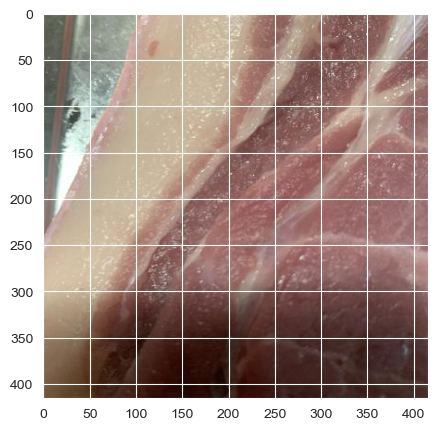

In [297]:
figure = plt.figure(figsize=(5,5))
plt.imshow(plt.imread(Main_Data["JPG"][2]))
plt.show()

In [298]:
figure = plt.figure(figsize=(5,5))
plt.imshow(plt.imread(Fresh_Meat["JPG"][10]))
plt.show()

KeyError: 10

<Figure size 500x500 with 0 Axes>

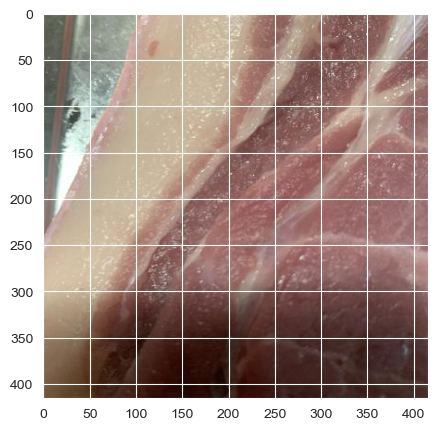

In [299]:
figure = plt.figure(figsize=(5,5))
plt.imshow(plt.imread(Melted_Meat["JPG"][2]))
plt.show()

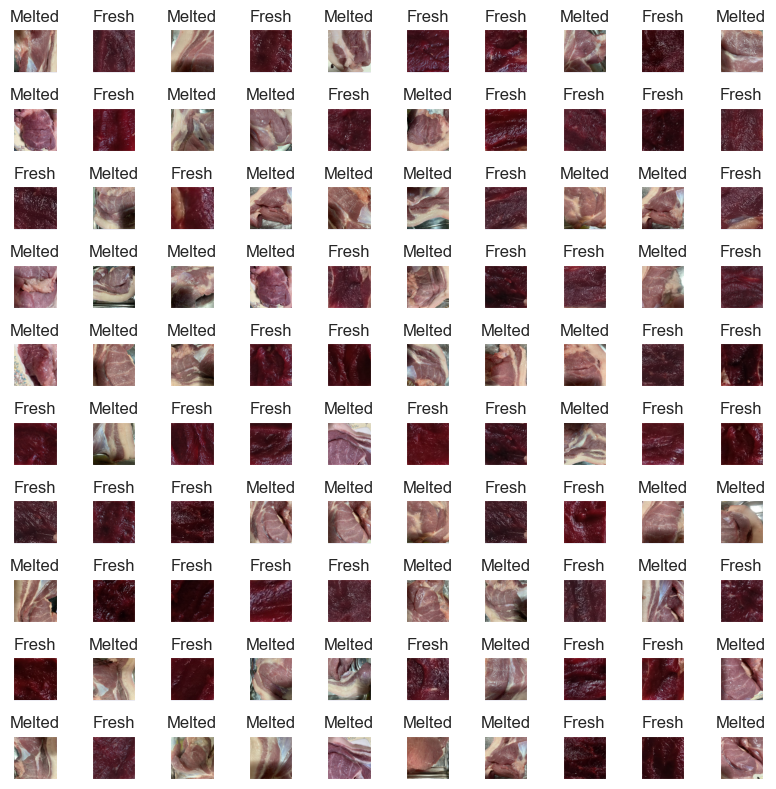

In [300]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["JPG"][i]))
    ax.set_title(Main_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

# SPLITTING TRAIN AND TEST

In [334]:
# Split the remaining data into training and validation sets
# Train_Data, Validation_Data = train_test_split(Main_Data, 
#                                                train_size=0.8, 
#                                                shuffle=True, 
#                                                random_state=42
#                                                )

# # Split data initially
# Train_Data, Test_Data, Train_labels, Test_labels = train_test_split(
#     Main_Data, Labels_Train, train_size=0.7, shuffle=True, random_state=42
# )
# Test_Data, Valid_Data, Test_labels, Valid_labels = train_test_split(
#     Test_Data, Test_labels, train_size=0.5, shuffle=True, random_state=42
# )

# Create DataFrames for Train, Test, and Valid data
Train_Data = pd.concat([File_Path_Train, Labels_Name_Train], axis=1)
Test_Data = pd.concat([File_Path_Test, Labels_Name_Test], axis=1)
Valid_Data = pd.concat([File_Path_Valid, Labels_Name_Valid], axis=1)

# Memeriksa ukuran set
print(f"Train set size: {Train_Data.shape[0]}")
print(f"Validation set size: {Valid_Data.shape[0]}")
print(f"Test set size: {Test_Data.shape[0]}")

# Check columns
print(Train_Data.columns)
print(Test_Data.columns)
print(Valid_Data.columns)


Train set size: 2066
Validation set size: 452
Test set size: 452
Index(['JPG', 'CATEGORY'], dtype='object')
Index(['JPG', 'CATEGORY'], dtype='object')
Index(['JPG', 'CATEGORY'], dtype='object')


In [335]:
print(Train_Data.value_counts())

JPG                                      CATEGORY
Beef\Meat\train\Fresh\Fresh (1).jpg      Fresh       1
Beef\Meat\train\Melted\Melted (266).jpg  Melted      1
Beef\Meat\train\Melted\Melted (293).jpg  Melted      1
Beef\Meat\train\Melted\Melted (292).jpg  Melted      1
Beef\Meat\train\Melted\Melted (291).jpg  Melted      1
                                                    ..
Beef\Meat\train\Fresh\Fresh (649).jpg    Fresh       1
Beef\Meat\train\Fresh\Fresh (648).jpg    Fresh       1
Beef\Meat\train\Fresh\Fresh (647).jpg    Fresh       1
Beef\Meat\train\Fresh\Fresh (645).jpg    Fresh       1
Beef\Meat\train\Melted\Melted (994).jpg  Melted      1
Name: count, Length: 2066, dtype: int64


In [336]:
Fresh_Meat_Test = Train_Data[Train_Data == "Fresh"]
Melted_Meat_Test = Train_Data[Train_Data == "Melted"]

In [337]:
print(Fresh_Meat_Test.head())

   JPG CATEGORY
0  NaN    Fresh
1  NaN    Fresh
2  NaN    Fresh
3  NaN    Fresh
4  NaN    Fresh


In [338]:
print(Melted_Meat_Test.head())

   JPG CATEGORY
0  NaN      NaN
1  NaN      NaN
2  NaN      NaN
3  NaN      NaN
4  NaN      NaN


In [339]:
print(Train_Data.shape)

(2066, 2)


In [340]:
print(Test_Data.shape)

(452, 2)


# IMAGE GENERATOR

In [341]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split, KFold
import pandas as pd

In [342]:
# Data_Generator = ImageDataGenerator(rescale=1.0 /255.0,
#                                     validation_split= 0.15)
# Test_Generator = ImageDataGenerator(rescale=1./255)

Data_Generator = ImageDataGenerator(
    rescale=1.0/255.0, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
Test_Generator = ImageDataGenerator(rescale=1.0/255.0)

In [343]:

# Train data generator
Train_Gen = Data_Generator.flow_from_dataframe(
    dataframe=Train_Data,
    x_col="JPG",
    y_col="CATEGORY",
    target_size=(224, 224),  # Adjust based on your model input size
    batch_size=32,
    shuffle=True,
    seed=42,
    class_mode="categorical",
    color_mode="rgb"
)

# Test data generator
Test_Gen = Test_Generator.flow_from_dataframe(
    dataframe=Test_Data,
    x_col="JPG",
    y_col="CATEGORY",
    target_size=(224, 224),  # Adjust based on your model input size
    batch_size=32,
    shuffle=False,
    class_mode="categorical",
    color_mode="rgb"
)

# Validation data generator
Validation_Gen = Data_Generator.flow_from_dataframe(
    dataframe=Valid_Data,
    x_col="JPG",
    y_col="CATEGORY",
    target_size=(224, 224),  # Adjust based on your model input size
    batch_size=32,
    shuffle=True,
    seed=42,
    class_mode="categorical",
    color_mode="rgb"
)

Found 2066 validated image filenames belonging to 2 classes.
Found 452 validated image filenames belonging to 2 classes.
Found 452 validated image filenames belonging to 2 classes.


In [344]:
print(Train_Gen.classes[0:20])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [345]:
print(Train_Gen.split)

None


In [346]:
print(Test_Gen.classes[0:20])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [347]:
print(Test_Gen.split)

None


In [348]:
print(Validation_Gen.classes[0:20])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [349]:
print(Validation_Gen.split)

None


# MODEL

In [350]:
# Define a CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [351]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [352]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 batch_normalization_13 (Ba  (None, 222, 222, 16)      64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_14 (Ba  (None, 111, 111, 16)      64        
 tchNormalization)                                               
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 32)      4640      
                                                      

In [353]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Call_Back = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.99 and logs.get('val_accuracy') > 0.99):
            print("\nReached or Exceed 99.0% accuracy so cancelling training!")
            self.model.stop_training = True
            
callback = myCallback()

In [354]:
# K-Fold Cross Validation
# kfold = KFold(n_splits=5, shuffle=True, random_state=44)
# for train_index, val_index in kfold.split(Train_Data):
#     # Split data for the current fold
#     T_train, T_val = Train_Data.iloc[train_index], Train_Data.iloc[val_index]
#     y_train, y_val = Train_.iloc[train_index], Train_labels.iloc[val_index]
    # Train the model
ANN_Model = model.fit(
        Train_Gen,
        validation_data=Validation_Gen,
        epochs=50,
        # batch_size=32,
        verbose=1,
        callbacks=[Call_Back, model_checkpoint, callback]
    )

Epoch 1/50
65/65 [==============================] - 42s 618ms/step - loss: 0.3893 - accuracy: 0.9768 - val_loss: 0.3117 - val_accuracy: 0.9513
Epoch 2/50
65/65 [==============================] - 39s 602ms/step - loss: 0.0736 - accuracy: 0.9956 - val_loss: 0.3895 - val_accuracy: 0.9624
Epoch 3/50
65/65 [==============================] - 39s 606ms/step - loss: 0.0221 - accuracy: 0.9976 - val_loss: 0.7309 - val_accuracy: 0.9469


#### MODEL CHECKING

In [355]:
Model_Results = model.evaluate(Test_Gen)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

15/15 [==============================] - 2s 146ms/step - loss: 0.4098 - accuracy: 0.9425
LOSS:  0.4098
ACCURACY:  0.94


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


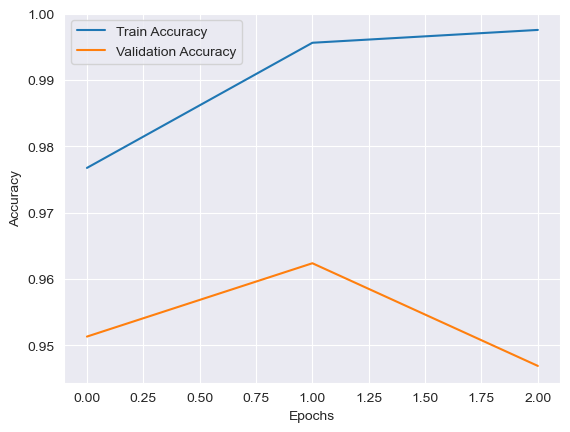

In [356]:
# Ensure the 'history' object has the correct keys
print(ANN_Model.history.keys())

# Plot accuracy
plt.plot(ANN_Model.history["accuracy"], label="Train Accuracy")
plt.plot(ANN_Model.history["val_accuracy"], label="Validation Accuracy")

# Add labels
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Add legend
plt.legend()

# Show plot
plt.show()

In [357]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

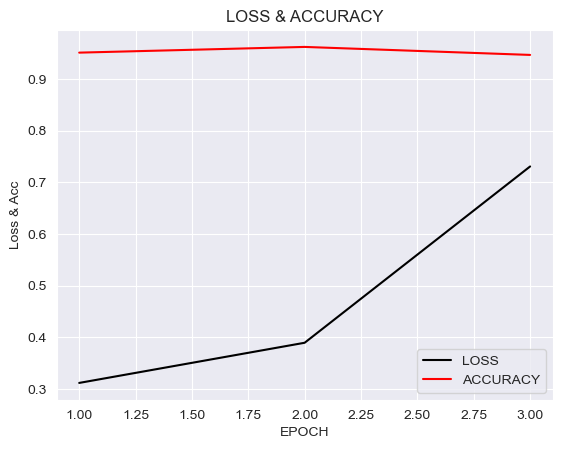

In [358]:
plt.plot(epochs,val_losses,"k-",label="LOSS")
plt.plot(epochs,val_acc,"r",label="ACCURACY")
plt.title("LOSS & ACCURACY")
plt.xlabel("EPOCH")
plt.ylabel("Loss & Acc")
plt.legend()
plt.show()

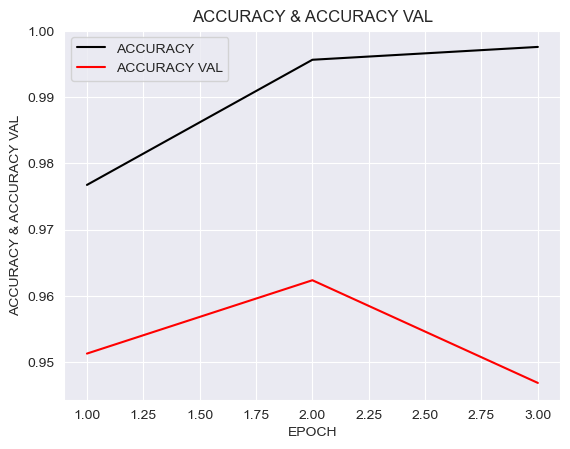

In [359]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"r",label="ACCURACY VAL")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

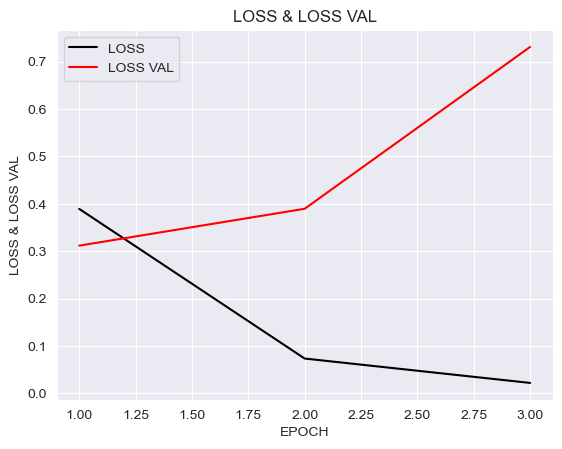

In [360]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"r",label="LOSS VAL")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

<Axes: >

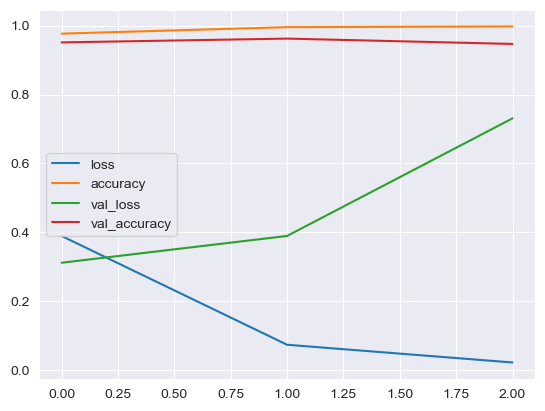

In [361]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

# PREDICTION PROCESS

In [362]:
# Generate predictions on the test data
Model_Predict = model.predict(Test_Gen)
Model_Predict = np.argmax(Model_Predict, axis=1)

15/15 [==============================] - 3s 169ms/step


In [363]:
# Map predictions to their corresponding labels
Predict_Label = Test_Gen.class_indices
Predict_Label = dict((v, k) for k, v in Predict_Label.items())
Model_Predict = [Predict_Label[k] for k in Model_Predict]

In [364]:
print(Model_Predict[220:234])

['Fresh', 'Melted', 'Melted', 'Melted', 'Melted', 'Melted', 'Melted', 'Melted', 'Melted', 'Melted', 'Melted', 'Melted', 'Melted', 'Melted']


In [365]:
Test_Results = list(Test_Data["CATEGORY"])

#### Classification Report

In [366]:
Class_Report = classification_report(Test_Results, Model_Predict)
print(Class_Report)

              precision    recall  f1-score   support

       Fresh       1.00      0.88      0.94       226
      Melted       0.90      1.00      0.95       226

    accuracy                           0.94       452
   macro avg       0.95      0.94      0.94       452
weighted avg       0.95      0.94      0.94       452


#### Confusion Matrix

Confusion Matrix:
[[200  26]
 [  0 226]]


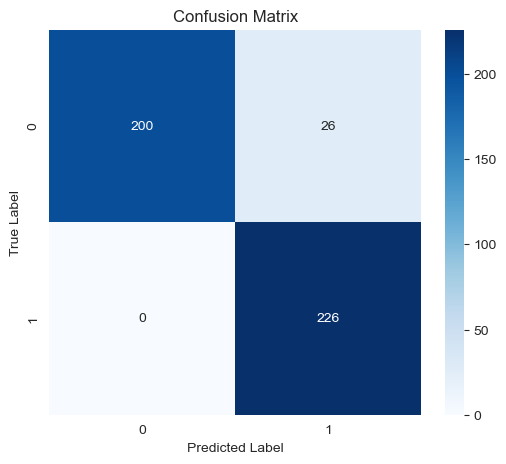

In [367]:
# Membuat confusion matrix
conf_matrix = confusion_matrix(Test_Results, Model_Predict)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan confusion matrix dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

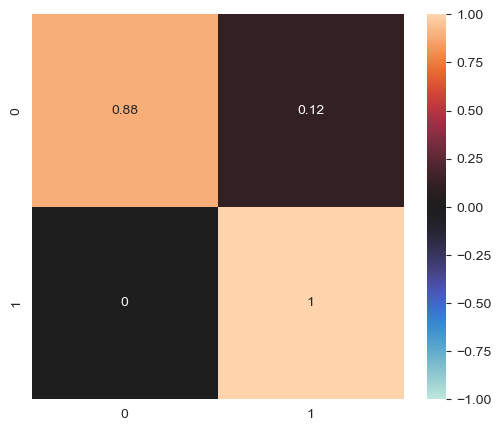

In [368]:
Conf_Report = confusion_matrix(Test_Results,Model_Predict, normalize="true")
figure = plt.figure(figsize=(6,5))
sns.heatmap(Conf_Report,vmax=1,center=0,vmin=-1,annot=True)
plt.show()

# CHECKING PREDICTION

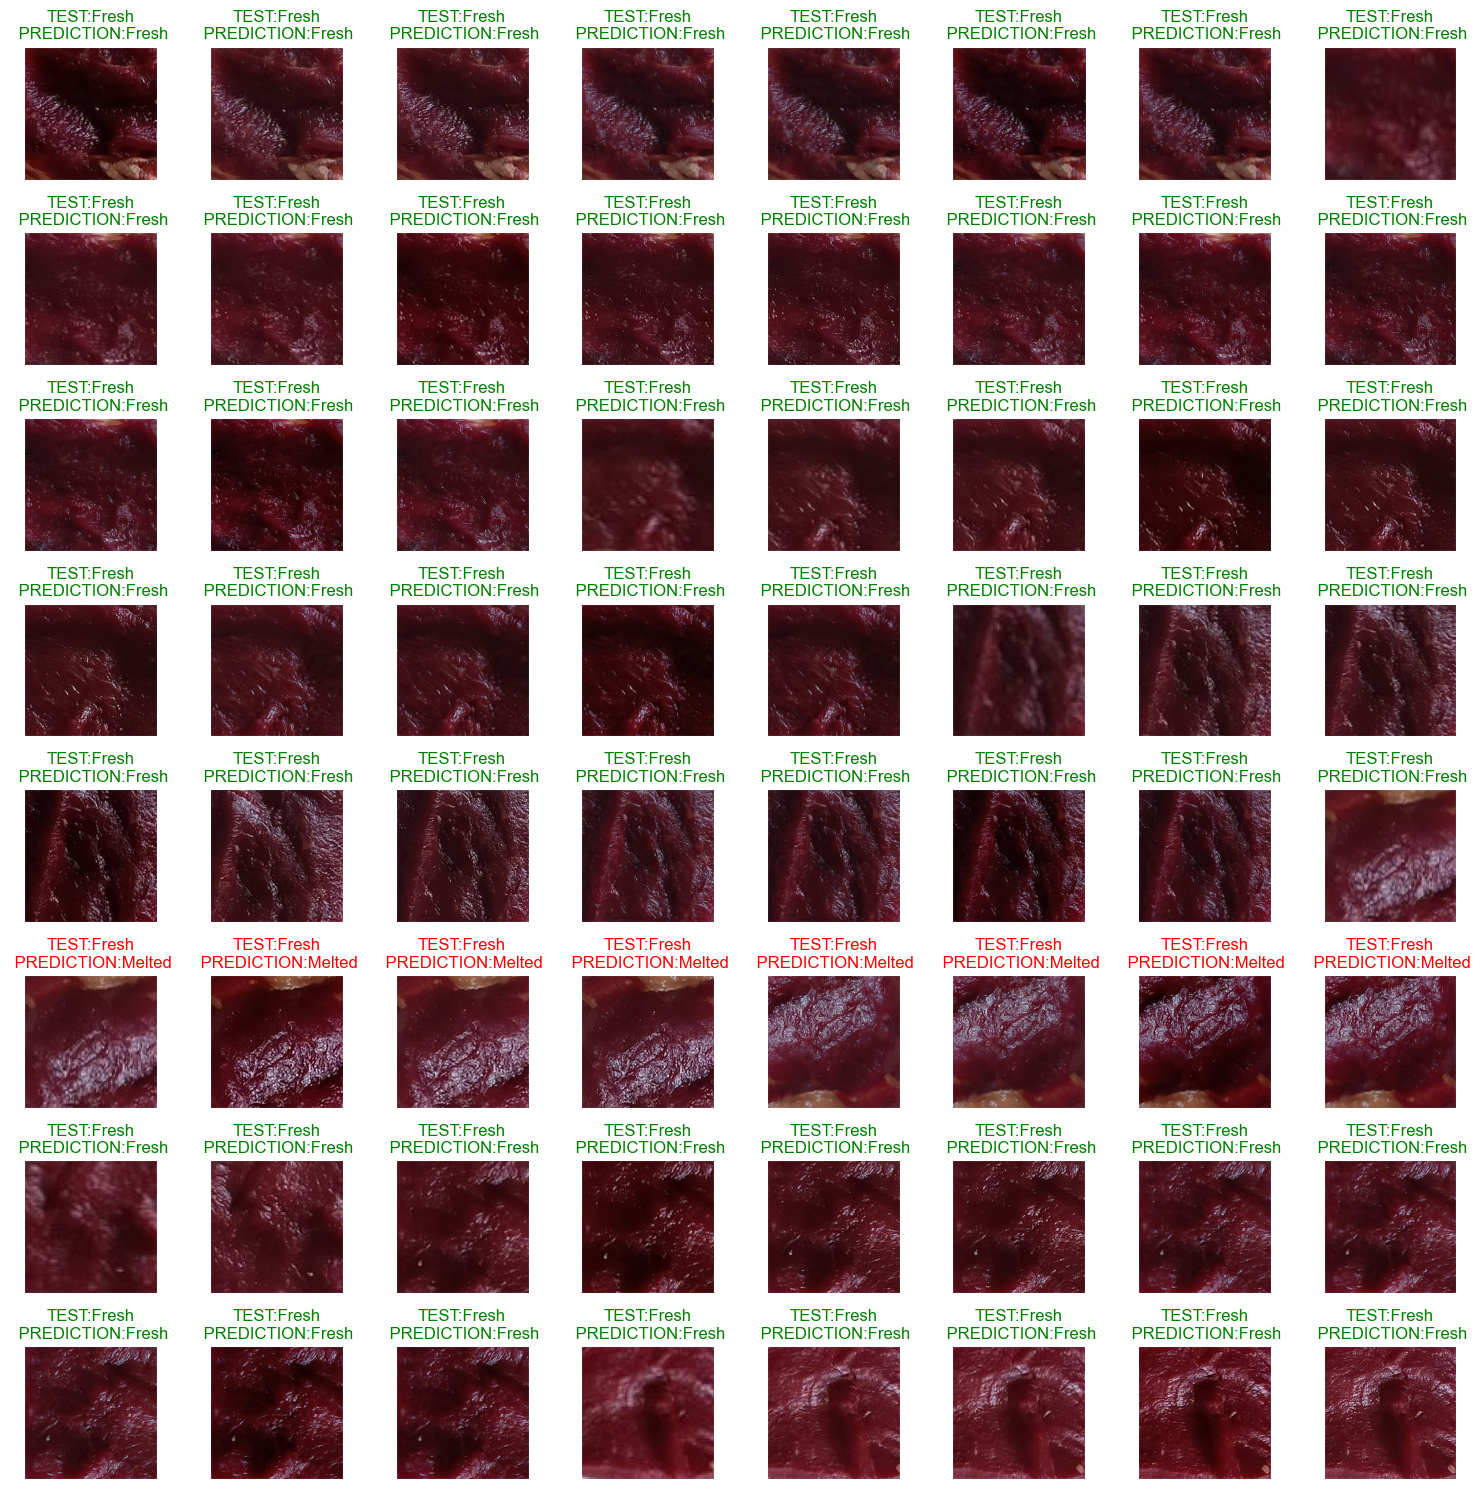

In [370]:
# Tentukan indeks untuk memulai dan mengakhiri pemilihan gambar
start_index = 138
end_index = 202

# Hitung jumlah kolom dan baris untuk grid gambar
num_rows = 8
num_cols = 8

# Buat gambar dengan grid subplot
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15), subplot_kw={'xticks': [], 'yticks': []})

# Iterate melalui gambar yang akan ditampilkan
for i, ax in enumerate(axes.flat):
    # Hitung indeks gambar dan label prediksi yang sesuai
    index = start_index + i
    true_category = Test_Data.iloc[index]["CATEGORY"]
    prediction = Model_Predict[index]
    
    # Tentukan warna label berdasarkan kebenaran prediksi
    color = 'green' if true_category == prediction else 'red'
    
    # Tampilkan gambar dan label prediksi dengan warna yang sesuai
    ax.imshow(plt.imread(Test_Data.iloc[index]["JPG"]))
    ax.set_title(f"TEST:{true_category}\n PREDICTION:{prediction}", color=color)

# Tampilkan gambar
plt.tight_layout()
plt.show()
